# Testing on another signal on bp

In [52]:
from __future__ import print_function
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style('white')

import sys
#sys.path.append("C:/Users/user/Desktop/ipynb/misshapen/")
sys.path.append("C:/Users/Yimeng/Documents/GitHub/")
import misshapen
from misshapen import nonshape

In [53]:
import util
import Process
# In case made some change
import imp
imp.reload(util)
imp.reload(Process)

<module 'Process' from 'C:\\Users\\Yimeng\\Documents\\GitHub\\LabWork\\Process.py'>

In [54]:
data_paths, all_regions = util.load_paths()
df = pd.read_csv('behavior_all.csv',index_col=0)
dfbp=df[df['subject']=='bp']

In [55]:
x = np.load(data_paths['bp']['1'][1])

# Define time series (Fs = 1000Hz)
Fs = 1000.
N_samples = len(x)


t_max = N_samples/float(Fs)
t = np.arange(0,t_max,1/float(Fs))

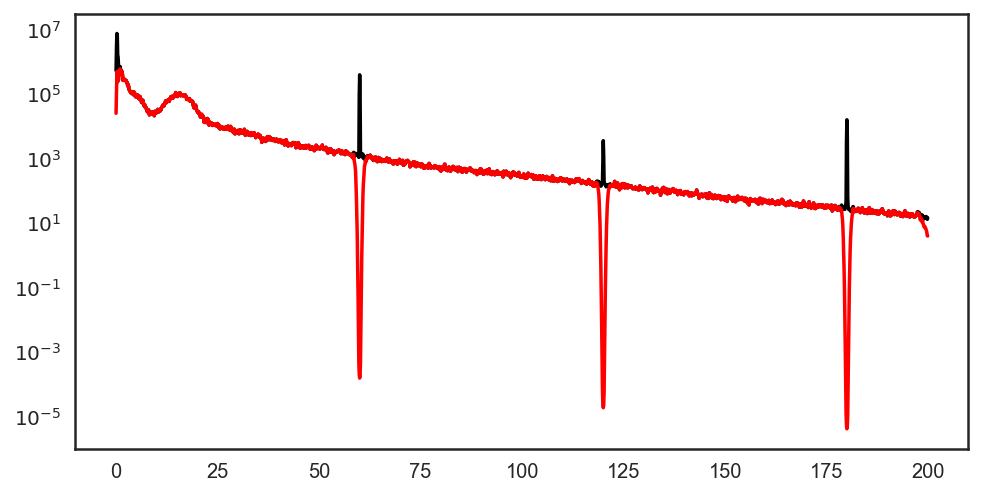

In [56]:
x_filt=Process.preprocess_filters(x,Fs)

f, psd = nonshape.f_psd(x, Fs, 'welch',welch_params={'nperseg': 10000})
f, psd2 = nonshape.f_psd(x_filt, Fs, 'welch',welch_params={'nperseg': 10000})
flim = (0,200)
plt.figure(figsize=(8,4))
plt.semilogy(f[np.logical_and(f>=flim[0],f<flim[1])],psd[np.logical_and(f>=flim[0],f<flim[1])],'k')
plt.semilogy(f[np.logical_and(f>=flim[0],f<flim[1])],psd2[np.logical_and(f>=flim[0],f<flim[1])],'r')


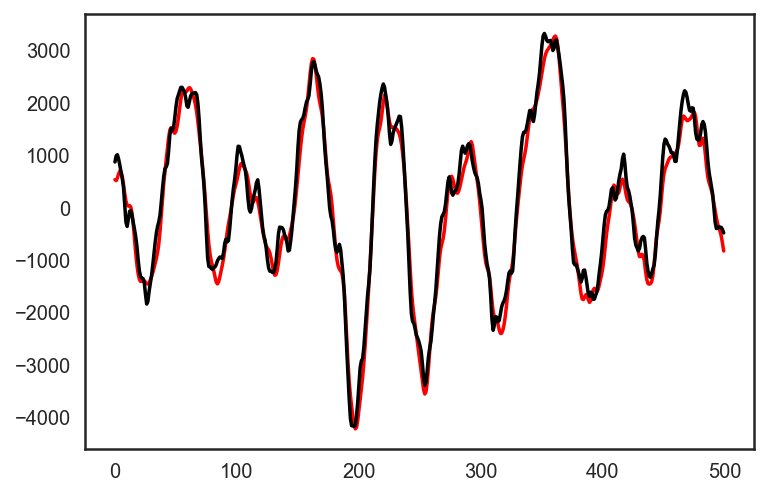

In [57]:
plt.plot(x_filt[500:1000],'r')
plt.plot(x[500:1000],'k')

In [62]:
amp = Process.amp_by_trial(x_filt,(13,30),Fs,(-1000,1000),dfbp['cue_start'])
np.shape(amp)

(150, 2000)

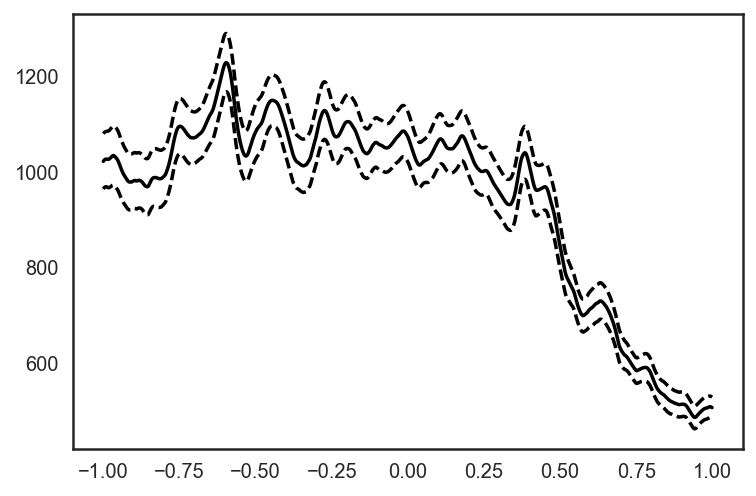

In [63]:
samps_window_lim=(-1000,1000)
avg_beta_amp = np.mean(amp,axis=0)
sem_beta_amp = sp.stats.sem(amp,axis=0)
t = np.arange(samps_window_lim[0]/Fs,samps_window_lim[1]/Fs,1/Fs)
plt.plot(t,avg_beta_amp,'k-')
plt.plot(t,avg_beta_amp-sem_beta_amp,'k--')
plt.plot(t,avg_beta_amp+sem_beta_amp,'k--')